# Clustering - Gaussian Mixture Model
* simple notebook for GMM clustering
* Supporting graphs for model selection and final results
* dataset : iris

In [1]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
import itertools
from scipy import linalg

In [2]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

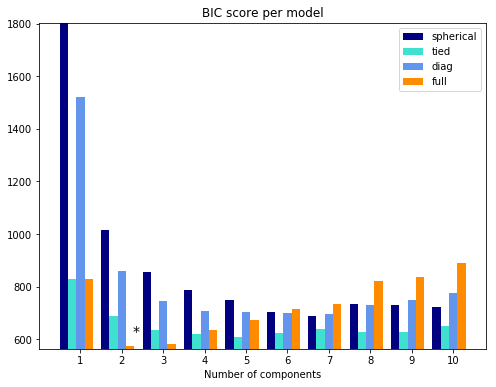

In [3]:
lowest_bic = np.infty
bic = []
n_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type, tol=0.001, reg_covar=1e-06, 
                              max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, 
                              precisions_init=None, random_state=42, warm_start=False, verbose=0, verbose_interval=10)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(1, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_range):
                                  (i + 1) * len(n_range)],
                        width=.2, color=color))
plt.xticks(n_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.show()

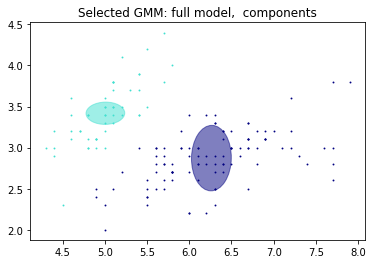

In [4]:
# Plot the winner
splot = plt.subplot(1, 1, 1)
Y_ = clf.predict(x)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(x[Y_ == i, 0], x[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)
    
plt.title('Selected GMM: full model,  components')
plt.show()